# Fashion Clothing Products Analysis - EDA Project

# Scenario1

You have been provided with 2 datasets. You will be learning here how to create the dataframe from 2 datasets and make some minor changes as required.
Recognize the attributes carefully and make sure they are aligned in proper format.


## Task1

1.	Import all the relevant packages (Eg: Numpy, Seaborn...)
2.	Import the datasets into the python environment.
3.	Check the structure, statistics and other important functions. (Only observe the changes)


###### Import relevant packages

In [196]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

###### Import the datasets "product details" and "products catalog"

In [92]:
df1 = pd.read_csv("product details.csv")
df1.head()

,ProductID,ProductName,ProductBrand
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR
3,10015921,Raymond Men Blue Self-Design Single-Breasted B...,Raymond
4,10017833,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx


In [93]:
df2 = pd.read_csv("products catalog.csv")
df2.head()

,Gender,Price (INR),NumImages,ID,Description,PrimaryColor
0,Women,593,5,10182131,"Off-White printed woven A-line top, has a rou...",White
1,Men,6396,5,10052169,Display: AnalogueMovement: QuartzPower source:...,Black
2,Women,599,5,10168643,"Blue printed knitted regular top, has a high ...",Blue
3,Men,1034,5,10155427,"Grey and Purple checked smart casual shirt, ha...",Grey
4,Men,477,3,10191059,Beige and Brown striped beltReversible: NoStre...,Brown


###### Check the shape of the dataset and guess the primary key to make join

In [94]:
print(  df1.shape  )
print(  df2.shape  )

(12491, 3)
(12491, 6)


## Task2

1.	Create a new dataframe “df” by joining the 2 datasets
2.	Drop the duplicate data
3.	Check for missing values


In [95]:
df = pd.merge(df1, df2, left_on = 'ProductID', right_on="ID", how = 'inner')

In [96]:
df.shape

(12491, 9)

In [97]:
df.head()

,ProductID,ProductName,ProductBrand,Gender,Price (INR),NumImages,ID,Description,PrimaryColor
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,11745,7,10017413,"Black and grey printed medium trolley bag, sec...",Black
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,5810,7,10016283,Beige & Grey made to measure kurta with churid...,Beige
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR,Women,899,7,10009781,Pink coloured wash 5-pocket high-rise cropped ...,Pink
3,10015921,Raymond Men Blue Self-Design Single-Breasted B...,Raymond,Men,5599,5,10015921,Blue self-design bandhgala suitBlue self-desig...,Blue
4,10017833,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx,Men,759,5,10017833,"Brown and off-white printed casual shirt, has ...",White


###### Remove the duplicate column

In [98]:
df.drop("ID", axis = 1, inplace = True)

In [99]:
df.head(2)

,ProductID,ProductName,ProductBrand,Gender,Price (INR),NumImages,Description,PrimaryColor
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,11745,7,"Black and grey printed medium trolley bag, sec...",Black
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,5810,7,Beige & Grey made to measure kurta with churid...,Beige


In [100]:
df.shape

(12491, 8)

###### Check for duplicate records

In [101]:
df.duplicated().sum()

0

###### Dataset structure

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12491 entries, 0 to 12490
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     12491 non-null  int64 
 1   ProductName   12491 non-null  object
 2   ProductBrand  12491 non-null  object
 3   Gender        12491 non-null  object
 4   Price (INR)   12491 non-null  int64 
 5   NumImages     12491 non-null  int64 
 6   Description   12491 non-null  object
 7   PrimaryColor  11597 non-null  object
dtypes: int64(3), object(5)
memory usage: 878.3+ KB


###### Check for NULL Values

In [13]:
df.isnull().sum()

ProductID         0
ProductName       0
ProductBrand      0
Gender            0
Price (INR)       0
NumImages         0
Description       0
PrimaryColor    894
dtype: int64

_PrimaryColor is the only column with null values_

###### Dataset Description

In [14]:
df.describe(include = 'all')

,ProductID,ProductName,ProductBrand,Gender,Price (INR),NumImages,Description,PrimaryColor
count,1.249100e+04,12491,12491,12491,12491.000000,12491.000000,12491,11597
unique,NaN,10761,677,6,NaN,NaN,10435,27
top,NaN,Parx Men Blue Slim Fit Checked Casual Shirt,Indian Terrain,Women,NaN,NaN,"Blue medium wash 5-pocket mid-rise jeans, clea...",Blue
freq,NaN,16,971,5126,NaN,NaN,54,3443
mean,9.917160e+06,NaN,NaN,NaN,1452.660956,4.913698,NaN,NaN
std,1.438006e+06,NaN,NaN,NaN,2118.503976,1.092333,NaN,NaN
min,1.012060e+05,NaN,NaN,NaN,90.000000,1.000000,NaN,NaN
25%,1.006215e+07,NaN,NaN,NaN,649.000000,5.000000,NaN,NaN
50%,1.015463e+07,NaN,NaN,NaN,920.000000,5.000000,NaN,NaN
75%,1.021565e+07,NaN,NaN,NaN,1499.000000,5.000000,NaN,NaN


###### Seperate the names of the numerical and categorical cols

In [15]:
cat_cols = [col for col in df.columns if df[col].dtypes == "O"]
print(cat_cols)

num_cols = [col for col in df.columns if df[col].dtypes != "O"]
print(num_cols)

['ProductName', 'ProductBrand', 'Gender', 'Description', 'PrimaryColor']
['ProductID', 'Price (INR)', 'NumImages']


###### Check for Number Of Unique values for categorical cols

In [105]:
for col in cat_cols : 
    print(f"Column Name = '{col}'")
    print(f"Total Unique Values = {df[col].nunique()}"  )
    print("__" * 30)

Column Name = 'ProductName'
Total Unique Values = 10761
____________________________________________________________
Column Name = 'ProductBrand'
Total Unique Values = 677
____________________________________________________________
Column Name = 'Gender'
Total Unique Values = 6
____________________________________________________________
Column Name = 'Description'
Total Unique Values = 10435
____________________________________________________________
Column Name = 'PrimaryColor'
Total Unique Values = 27
____________________________________________________________


###### Check for Unique values for categorical cols

In [106]:
for col in cat_cols : 
    print(f"Column Name = '{col}' \n")
    print(df[col].unique())
    print("__" * 30)
    print()

Column Name = 'ProductName' 

['DKNY Unisex Black & Grey Printed Medium Trolley Bag'
 'EthnoVogue Women Beige & Grey Made to Measure Custom Made Kurta Set with Jacket'
 'SPYKAR Women Pink Alexa Super Skinny Fit High-Rise Clean Look Stretchable Cropped Jeans'
 ... '612 league Girls Navy Blue & White Printed Regular Fit Denim Shorts'
 'Bvlgari Men Aqva Pour Homme Marine Eau de Toilette 150ml'
 'Pepe Jeans Men Black & Grey Striped Polo Collar T-shirt']
____________________________________________________________

Column Name = 'ProductBrand' 

['DKNY' 'EthnoVogue' 'SPYKAR' 'Raymond' 'Parx' 'SHOWOFF' 'Kenneth Cole'
 'Police' 'Vishudh' 'Being Human' 'Homesake' 'SEJ by Nisha Gupta'
 'YAK YAK' 'PARFAIT' 'Michael Kors' 'HIGHLANDER' 'JEWEL JUNCTION' 'ID'
 'Story@home' 'Gini and Jony' 'Sera' 'AccessHer' 'Alcis'
 'Difference of Opinion' 'Tokyo Talkies' 'ANNA SUI' 'her by invictus'
 'Soie' 'Lara Karen' 'Urban Dog' 'ahilya' 'VASTRAMAY' 'Campus Sutra'
 'FIDO DIDO' 'MIAH Decor' 'BuckleUp' 'Peter Engl

In [17]:
df['NumImages'].unique()

array([ 7,  5,  4,  6,  3,  2,  1,  8,  9, 10], dtype=int64)

# Scenario2

You have successfully created the dataframe from the two input files.
Here we will be processing cleaning operations and intro to brief analysis.
Expected shape of the dataset: 12491 rows and 8 columns


## Task

1.	There is a column that needs string strip operation. Identify that and apply it.
2.	Fill the missing value by ‘Others’ in the column containing it
3.	Since all the column names are single word so you can convert the ‘Price (INR)’ also to single name ‘Price’.
4.	Analyse the Gender column and include your viewpoints how to make it useful.


##### There are spaces in the 'PrimaryColor' column so removing them

In [107]:
#Removing leading spaces from PrimaryColor column
df['PrimaryColor'] = df['PrimaryColor'].str.lstrip()

In [110]:
df['PrimaryColor'].unique()

array(['Black', 'Beige', 'Pink', 'Blue', 'White', 'Brown', 'Burgundy',
       'Red', 'Green', 'Other', 'Maroon', 'Navy', 'Gold', 'Yellow',
       'Grey', 'Platinum', 'Silver', 'Khaki', 'Mustard', 'Lavender',
       'Matte', 'Rose', 'Charcoal', 'Purple', 'Orange', 'Peach',
       'Magenta', 'Bronze'], dtype=object)

In [109]:
#The NULL in PrimaryColor is simply filled with 'Other'
df['PrimaryColor'] = df['PrimaryColor'].fillna('Other')

In [111]:
"Violet" in df['PrimaryColor'].unique()

False

##### Finding Length of each unique ID

In [129]:
df["ProductIDLength"] = df["ProductID"].apply(lambda x : len( str(x)  ))

In [130]:
df.head()

,ProductID,ProductName,ProductBrand,Gender,Price (INR),NumImages,Description,PrimaryColor,ProductIDLength
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,11745,7,"Black and grey printed medium trolley bag, sec...",Black,8
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,5810,7,Beige & Grey made to measure kurta with churid...,Beige,8
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR,Women,899,7,Pink coloured wash 5-pocket high-rise cropped ...,Pink,8
3,10015921,Raymond Men Blue Self-Design Single-Breasted B...,Raymond,Men,5599,5,Blue self-design bandhgala suitBlue self-desig...,Blue,8
4,10017833,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx,Men,759,5,"Brown and off-white printed casual shirt, has ...",White,8


In [132]:
df["ProductIDLength"].value_counts()

8    12175
7      313
6        3
Name: ProductIDLength, dtype: int64

In [134]:
df.rename( columns = {"Price (INR)" : "Price"}, inplace = True )

In [138]:
df.head(2)

,ProductID,ProductName,ProductBrand,Gender,Price,NumImages,Description,PrimaryColor
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,11745,7,"Black and grey printed medium trolley bag, sec...",Black
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,5810,7,Beige & Grey made to measure kurta with churid...,Beige


In [137]:
df.drop("ProductIDLength", axis = 1, inplace = True)

# Scenario3

So far we have learnt the basics of the dataset and cleaned it as required. Over here you are going to perform deep analysis of the dataset with the help of data manipulation tricks as well as visualize the results. 
This is the most time consuming tasks and make sure you do perform proper analysis method. 
Expected shape of the dataset: 12491 rows and 8 columns


## Task1
1.	Univariate analysis of each variable
2.	Bivariate Analysis of categorical vs numerical variables (Take target variable as fixed variable here)
3.	Multivariate Analysis of categorical and numerical variables
4.	Check distribution of variables


### Gender Distribution

In [25]:
gender_group = df.groupby("Gender").agg(  TotalRecords = ("ProductID", "size"))
gender_group = gender_group.sort_values(by = "TotalRecords", ascending = False)

gender_group.head()

,TotalRecords
Gender,
Women,5126
Men,4591
Unisex,1188
Boys,1100
Girls,440


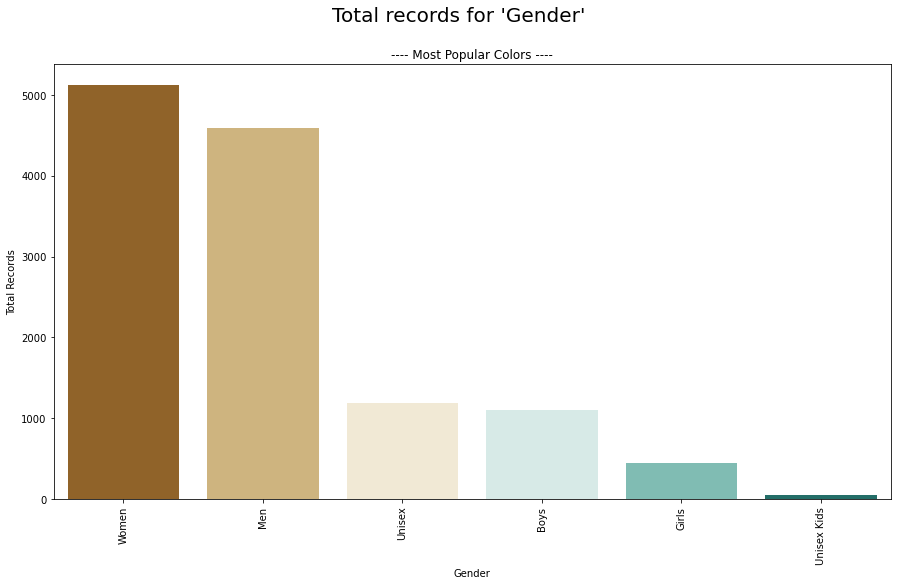

In [26]:
plt.figure(  figsize = (15, 8) )

sns.barplot( x = gender_group.index.values, 
           y = gender_group.TotalRecords.values,
           palette = "BrBG")
plt.xlabel("Gender")
plt.ylabel("Total Records")
plt.suptitle(f"Total records for '{gender_group.index.names[0]}'", fontsize = 20)
plt.title("---- Most Popular Colors ----")
plt.xticks(rotation = 90)
plt.show()

### Number Of Images Distribution

In [144]:
images_group = df.groupby("NumImages").agg(  TotalRecords = ("ProductID", "size"))
images_group = images_group.sort_values(by = "NumImages")

images_group

,TotalRecords
NumImages,
1,13
2,174
3,1211
4,1693
5,7134
6,1080
7,1057
8,102
9,24


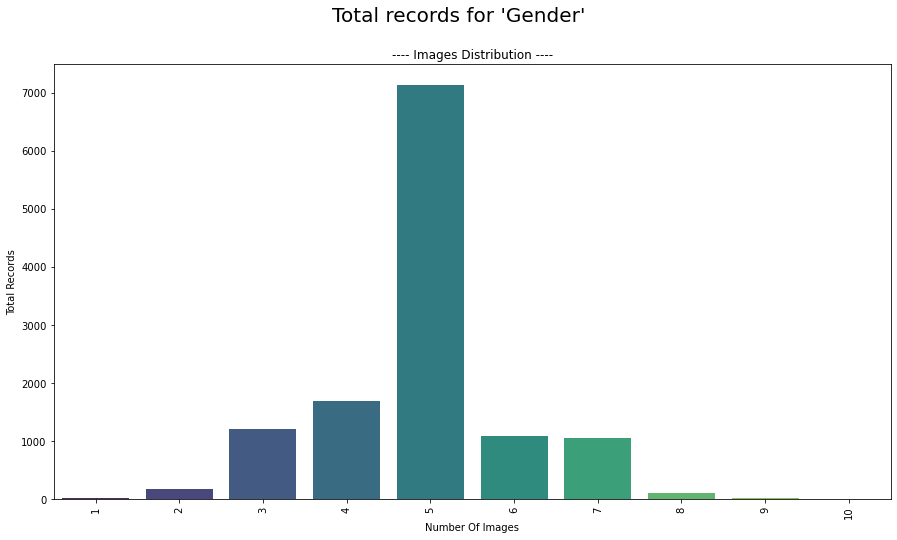

In [146]:
plt.figure(  figsize = (15, 8) )

sns.barplot( x = images_group.index.values, 
           y = images_group.TotalRecords.values,
           palette = "viridis")
plt.xlabel("Number Of Images")
plt.ylabel("Total Records")
plt.suptitle(f"Total records for '{gender_group.index.names[0]}'", fontsize = 20)
plt.title("---- Images Distribution ----")
plt.xticks(rotation = 90)
plt.show()

### Analyzing  ProductBrand Groups 
###### Studying their totalrecords, avgprice and avgimages for top 15 values against each of the category

In [202]:
products_group = df.groupby("ProductBrand").agg( TotalRecords = ("ProductID", 'size'), 
                                                   AvgPrice = ("Price", 'mean'), 
                                                   MaxPrice = ("Price", "max"))
products_group.head()

,TotalRecords,AvgPrice,MaxPrice
ProductBrand,,,
109F,1,1299.0000,1299
20Dresses,3,1153.0000,1396
612 league,16,713.3125,1395
7Rainbow,3,598.0000,620
AASK,1,1499.0000,1499


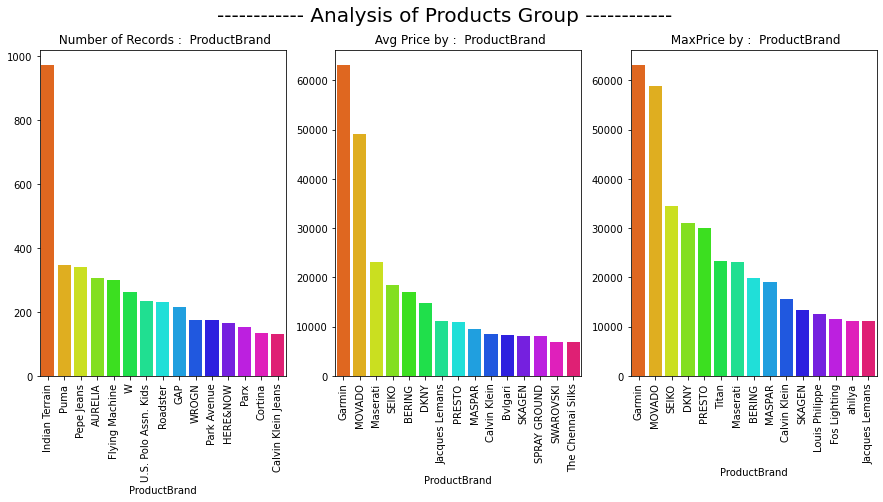

In [204]:
plt.figure(  figsize = (15, 6) )
plt.suptitle("------------ Analysis of Products Group ------------", fontsize = 20)


plt.subplot(1, 3, 1)
sns.barplot(x = products_group.sort_values(by = 'TotalRecords', ascending = False).index[ : 15], 
            y = products_group.sort_values(by = 'TotalRecords', ascending = False).TotalRecords.values[ : 15], 
            palette = "hsv")
plt.xticks(rotation = 90)
plt.title( f" Number of Records :  {products_group.index.name}")

plt.subplot(1, 3, 2)
sns.barplot(x = products_group.sort_values(by = 'AvgPrice', ascending = False).index[ : 15], 
            y = products_group.sort_values(by = 'AvgPrice', ascending = False).AvgPrice.values[ : 15], 
            palette = "hsv")
plt.xticks(rotation = 90)
plt.title( f" Avg Price by :  {products_group.index.name}")

plt.subplot(1, 3, 3)
sns.barplot(x = products_group.sort_values(by = 'MaxPrice', ascending = False).index[ : 15], 
            y = products_group.sort_values(by = 'MaxPrice', ascending = False).MaxPrice.values[ : 15], 
            palette = "hsv")
plt.xticks(rotation = 90)
plt.title( f" MaxPrice by :  {products_group.index.name}")

plt.show()

### Analyzing  Primary Colors Groups 
###### Studying their totalrecords, avgprice and avgimages for top 15 values against each of the category

In [200]:
colors_group = df.groupby("PrimaryColor").agg( TotalRecords = ("ProductID", 'size'), 
                                                   AvgPrice = ("Price", 'mean'))
colors_group.head()

,TotalRecords,AvgPrice
PrimaryColor,,
Beige,236,1402.004237
Black,1640,1951.487805
Blue,3443,1350.478652
Bronze,3,588.000000
Brown,473,1540.021142


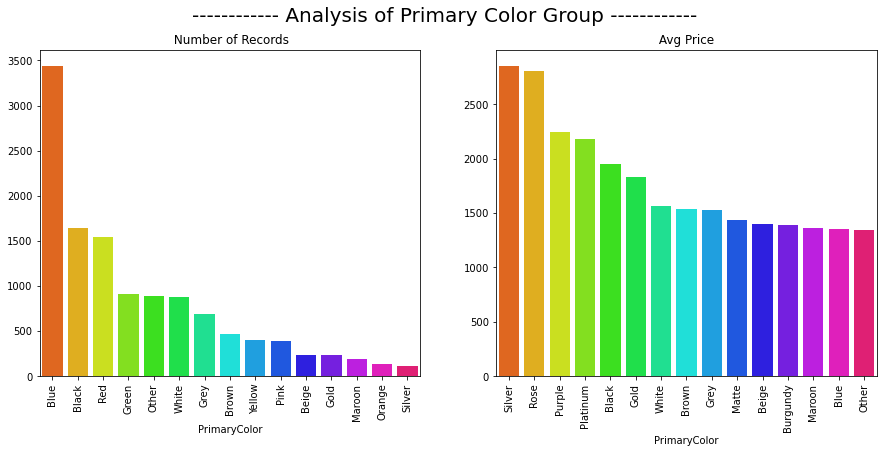

In [201]:
plt.figure(  figsize = (15, 6) )
plt.suptitle("------------ Analysis of Primary Color Group ------------", fontsize = 20)


plt.subplot(1, 2, 1)
sns.barplot(x = colors_group.sort_values(by = 'TotalRecords', ascending = False).index[ : 15], 
            y = colors_group.sort_values(by = 'TotalRecords', ascending = False).TotalRecords.values[ : 15], 
            palette = "hsv")
plt.xticks(rotation = 90)
plt.title( f" Number of Records")

plt.subplot(1, 2, 2)
sns.barplot(x = colors_group.sort_values(by = 'AvgPrice', ascending = False).index[ : 15], 
            y = colors_group.sort_values(by = 'AvgPrice', ascending = False).AvgPrice.values[ : 15], 
            palette = "hsv")
plt.xticks(rotation = 90)
plt.title( f" Avg Price ")

plt.show()

### Price Distribution

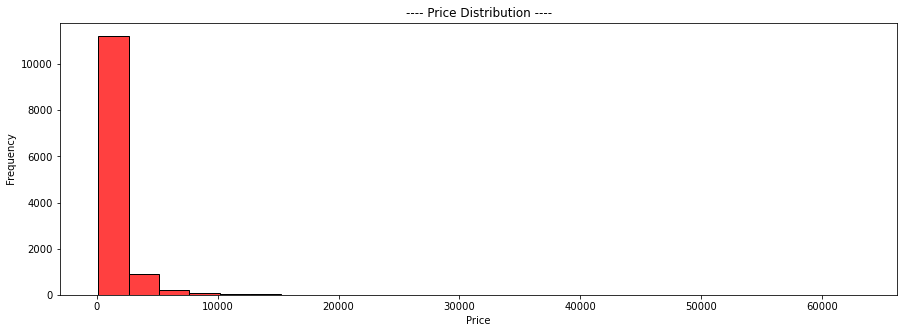

In [154]:
plt.figure(  figsize = (15, 5) )

sns.histplot( x = df['Price'] , color = "r", bins = 25)

plt.xlabel("Price")
plt.ylabel(" Frequency ")
plt.title("---- Price Distribution ----")
plt.show()

In [156]:
df['Price'].describe()

count    12491.000000
mean      1452.660956
std       2118.503976
min         90.000000
25%        649.000000
50%        920.000000
75%       1499.000000
max      63090.000000
Name: Price, dtype: float64

###### As the price varies from 90 to 63000 and mean is around 1400, we can acknowledge the same from the chart.
###### For more analysis we are creating the histogram for price less than 10000

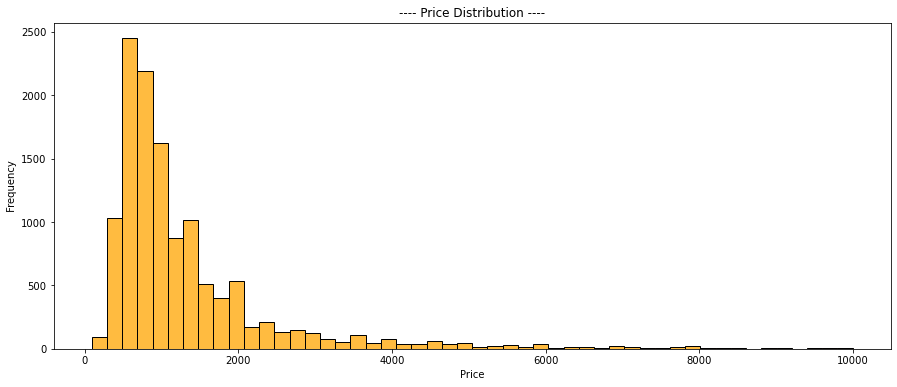

In [157]:
df2 = df[ df['Price'] <= 10000  ]

plt.figure(  figsize = (15, 6) )

sns.histplot( x = df2['Price'] , color='orange', bins = 50)

plt.xlabel("Price")
plt.ylabel(" Frequency ")
plt.title("---- Price Distribution ----")
plt.show()

In [170]:
df[ df['Price'] <= 10000  ]['Price'].describe()

count    12397.000000
mean      1325.894733
std       1224.723968
min         90.000000
25%        649.000000
50%        919.000000
75%       1484.000000
max       9999.000000
Name: Price, dtype: float64

**Majority of the people buy between 0 - 2000 price values**

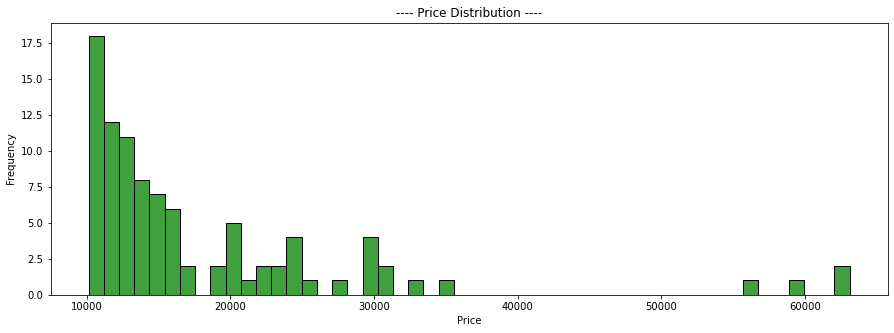

In [158]:
df3 = df[ df['Price'] > 10000  ]

plt.figure(  figsize = (15, 5) )

sns.histplot( x = df3['Price'] , color = 'g', bins = 50)

plt.xlabel("Price")
plt.ylabel(" Frequency ")
plt.title("---- Price Distribution ----")
plt.show()

In [171]:
df[ df['Price'] > 10000  ]['Price'].describe()

count       94.000000
mean     18170.968085
std      10870.750193
min      10125.000000
25%      11700.000000
50%      14200.500000
75%      20398.000000
max      63090.000000
Name: Price, dtype: float64

**Good number of people buy between 10000 and above price values also**

### Price Gender Distribution

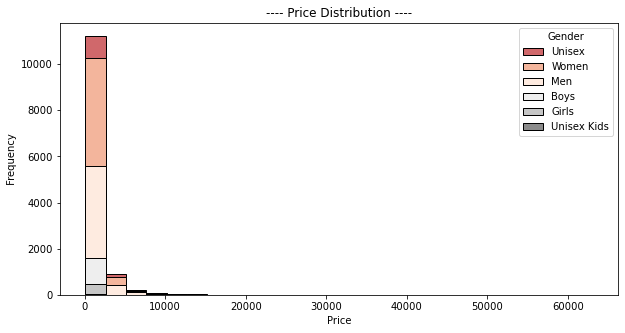

In [159]:
plt.figure(  figsize = (10, 5) )

sns.histplot( x = df['Price'] , hue = df['Gender'], palette = "RdGy", bins = 25, multiple="stack")

plt.xlabel("Price")
plt.ylabel(" Frequency ")
plt.title("---- Price Distribution ----")
plt.show()

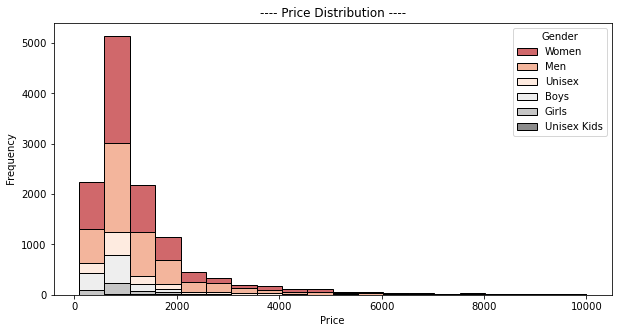

In [161]:
df2 = df[ df['Price'] <= 10000  ]

plt.figure(  figsize = (10, 5) )

sns.histplot( x = df2['Price'] ,hue = df2['Gender'], palette = "RdGy", bins = 20, multiple="stack")

plt.xlabel("Price")
plt.ylabel(" Frequency ")
plt.title("---- Price Distribution ----")
plt.show()

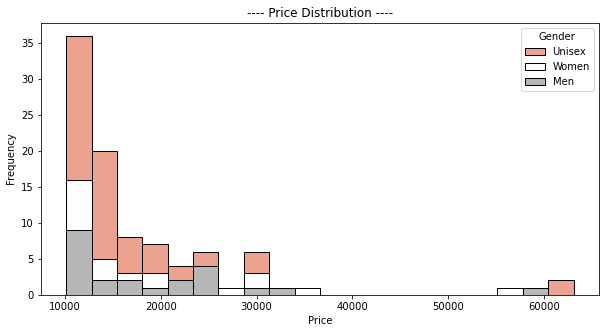

In [163]:
df3 = df[ df['Price'] > 10000  ]

plt.figure(  figsize = (10, 5) )

sns.histplot( x = df3['Price'] ,hue = df3['Gender'], palette = "RdGy", bins = 20, multiple="stack")

plt.xlabel("Price")
plt.ylabel(" Frequency ")
plt.title("---- Price Distribution ----")
plt.show()

- Price range <= 10000, All gender groups buy the product
- Price range > 10000, gender groups (unisex, women, men) buy the product
- Price range ~1000, majority of women buy the product


## Task2

1.	Create a new Column “NewGender” to analyse further its distribution.

    Logic Applied

            i.Include Boys & Men as Men
            ii.Include Girls & Women as Women
            iii.Include Unisex & Unisex Kids as Unisex

2.	Complete the analysis of NewGender along with other categorical cols.



In [174]:
df['NewGender'] = df['Gender'].copy()

In [175]:
df.head(2)

,ProductID,ProductName,ProductBrand,Gender,Price,NumImages,Description,PrimaryColor,NewGender
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,11745,7,"Black and grey printed medium trolley bag, sec...",Black,Unisex
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,5810,7,Beige & Grey made to measure kurta with churid...,Beige,Women


In [176]:
df['NewGender'].replace({"Unisex Kids" : "Unisex", 
                        "Boys" : "Men", 
                        "Girls" : "Women"}, inplace = True)

In [177]:
df.NewGender.unique()

array(['Unisex', 'Women', 'Men'], dtype=object)

### Analyzing  Gender Groups 
###### Studying their totalrecords, avgprice and avgimages  against each of the category

In [197]:
newgender_group = df.groupby("NewGender").agg( TotalRecords = ("ProductID", 'size'), 
                                                   AvgPrice = ("Price", 'mean'))
newgender_group

,TotalRecords,AvgPrice
NewGender,,
Men,5691,1434.021613
Unisex,1234,2120.924635
Women,5566,1323.562702


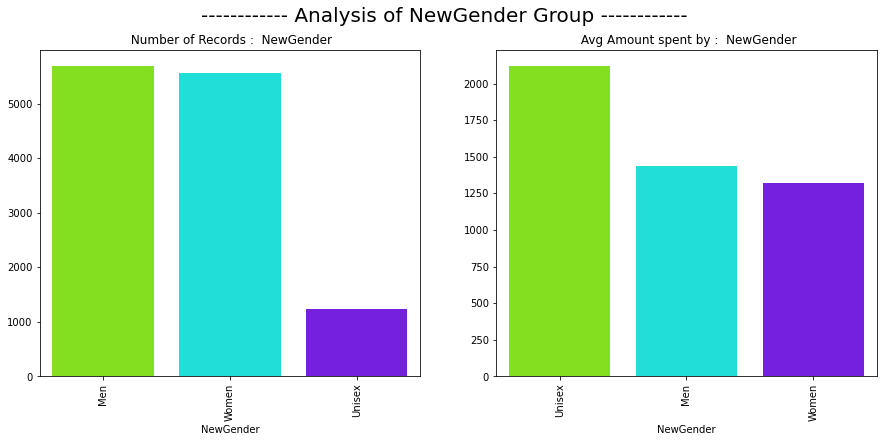

In [199]:
plt.figure(  figsize = (15, 6) )
plt.suptitle("------------ Analysis of NewGender Group ------------", fontsize = 20)


plt.subplot(1, 2, 1)
sns.barplot(x = newgender_group.sort_values(by = 'TotalRecords', ascending = False).index, 
            y = newgender_group.sort_values(by = 'TotalRecords', ascending = False).TotalRecords.values, 
            palette = "hsv")
plt.xticks(rotation = 90)
plt.title( f" Number of Records :  {newgender_group.index.name}")

plt.subplot(1, 2, 2)
sns.barplot(x = newgender_group.sort_values(by = 'AvgPrice', ascending = False).index, 
            y = newgender_group.sort_values(by = 'AvgPrice', ascending = False).AvgPrice.values, 
            palette = "hsv")
plt.xticks(rotation = 90)
plt.title( f" Avg Amount spent by :  {newgender_group.index.name}")


plt.show()

### Analyzing  Gender to ProductBrand 
###### Studying their totalrecords, avgprice and avgimages for top 15 product brand ?values against each of the category

In [182]:
df_gender = df[ df['NewGender'] == "Women" ]

women_group = df_gender.groupby("ProductBrand").agg( TotalRecords = ("ProductID", 'size'), 
                                                   AvgPrice = ("Price", 'mean'), 
                                                   AvgImages = ("NumImages", "mean"))
women_group.head(2)

,TotalRecords,AvgPrice,AvgImages
ProductBrand,,,
109F,1,1299.0,5.0
20Dresses,3,1153.0,5.0


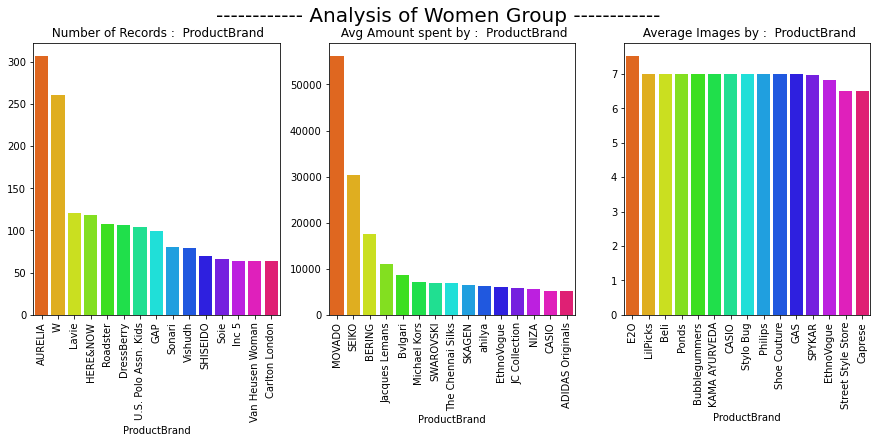

In [45]:
plt.figure(  figsize = (15, 5) )
plt.suptitle("------------ Analysis of Women Group ------------", fontsize = 20)


plt.subplot(1, 3, 1)
sns.barplot(x = women_group.sort_values(by = 'TotalRecords', ascending = False).index[ : 15], 
            y = women_group.sort_values(by = 'TotalRecords', ascending = False).TotalRecords.values[ : 15], 
            palette = "hsv")
plt.xticks(rotation = 90)
plt.title( f" Number of Records :  {women_group.index.name}")

plt.subplot(1, 3, 2)
sns.barplot(x = women_group.sort_values(by = 'AvgPrice', ascending = False).index[ : 15], 
            y = women_group.sort_values(by = 'AvgPrice', ascending = False).AvgPrice.values[ : 15], 
            palette = "hsv")
plt.xticks(rotation = 90)
plt.title( f" Avg Amount spent by :  {women_group.index.name}")

plt.subplot(1, 3, 3)
sns.barplot(x = women_group.sort_values(by = 'AvgImages', ascending = False).index[ : 15], 
            y = women_group.sort_values(by = 'AvgImages', ascending = False).AvgImages.values[ : 15], 
            palette = "hsv")
plt.xticks(rotation = 90)
plt.title( f" Average Images by :  {women_group.index.name}")

plt.show()

In [183]:
df_gender = df[ df['NewGender'] == "Men" ]

men_group = df_gender.groupby("ProductBrand").agg( TotalRecords = ("ProductID", 'size'), 
                                                   AvgPrice = ("Price", 'mean'), 
                                                   AvgImages = ("NumImages", "mean"))
men_group.head(2)

,TotalRecords,AvgPrice,AvgImages
ProductBrand,,,
612 league,11,736.454545,3.636364
ADIDAS,4,3736.500000,5.000000


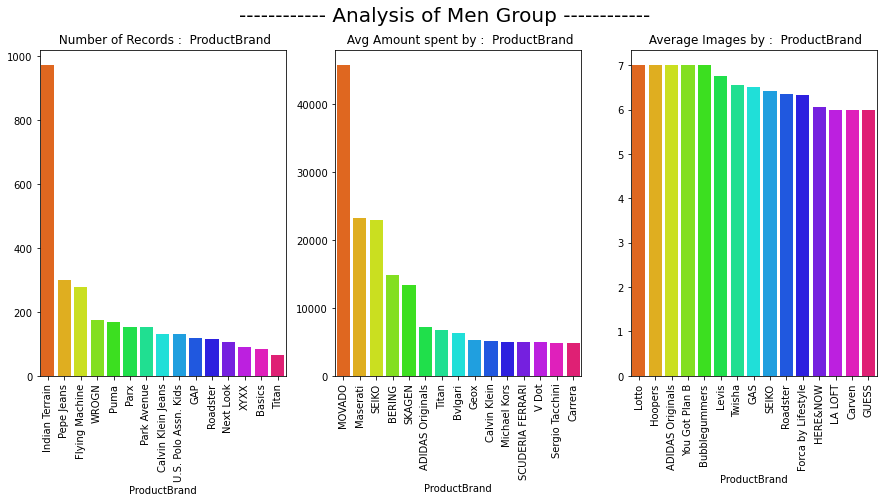

In [47]:
plt.figure(  figsize = (15, 6) )
plt.suptitle("------------ Analysis of Men Group ------------", fontsize = 20)


plt.subplot(1, 3, 1)
sns.barplot(x = men_group.sort_values(by = 'TotalRecords', ascending = False).index[ : 15], 
            y = men_group.sort_values(by = 'TotalRecords', ascending = False).TotalRecords.values[ : 15], 
            palette = "hsv")
plt.xticks(rotation = 90)
plt.title( f" Number of Records :  {men_group.index.name}")

plt.subplot(1, 3, 2)
sns.barplot(x = men_group.sort_values(by = 'AvgPrice', ascending = False).index[ : 15], 
            y = men_group.sort_values(by = 'AvgPrice', ascending = False).AvgPrice.values[ : 15], 
            palette = "hsv")
plt.xticks(rotation = 90)
plt.title( f" Avg Amount spent by :  {men_group.index.name}")

plt.subplot(1, 3, 3)
sns.barplot(x = men_group.sort_values(by = 'AvgImages', ascending = False).index[ : 15], 
            y = men_group.sort_values(by = 'AvgImages', ascending = False).AvgImages.values[ : 15], 
            palette = "hsv")
plt.xticks(rotation = 90)
plt.title( f" Average Images by :  {men_group.index.name}")

plt.show()

In [184]:
df_gender = df[ df['NewGender'] == "Unisex" ]

unisex_group = df_gender.groupby("ProductBrand").agg( TotalRecords = ("ProductID", 'size'), 
                                                   AvgPrice = ("Price", 'mean'), 
                                                   AvgImages = ("NumImages", "mean"))
unisex_group.head(2)

,TotalRecords,AvgPrice,AvgImages
ProductBrand,,,
Aapno Rajasthan,3,570.666667,4.0
AccessHer,1,380.000000,4.0


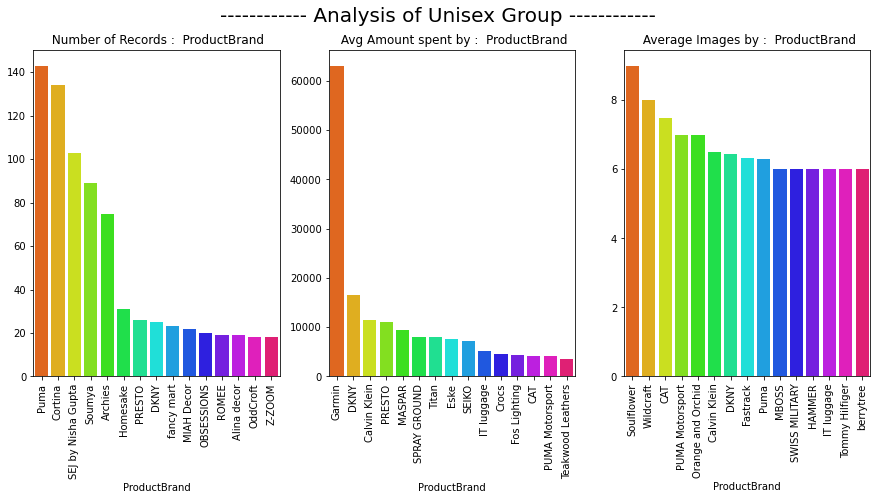

In [49]:
plt.figure(  figsize = (15, 6) )
plt.suptitle("------------ Analysis of Unisex Group ------------", fontsize = 20)


plt.subplot(1, 3, 1)
sns.barplot(x = unisex_group.sort_values(by = 'TotalRecords', ascending = False).index[ : 15], 
            y = unisex_group.sort_values(by = 'TotalRecords', ascending = False).TotalRecords.values[ : 15], 
            palette = "hsv")
plt.xticks(rotation = 90)
plt.title( f" Number of Records :  {unisex_group.index.name}")

plt.subplot(1, 3, 2)
sns.barplot(x = unisex_group.sort_values(by = 'AvgPrice', ascending = False).index[ : 15], 
            y = unisex_group.sort_values(by = 'AvgPrice', ascending = False).AvgPrice.values[ : 15], 
            palette = "hsv")
plt.xticks(rotation = 90)
plt.title( f" Avg Amount spent by :  {unisex_group.index.name}")

plt.subplot(1, 3, 3)
sns.barplot(x = unisex_group.sort_values(by = 'AvgImages', ascending = False).index[ : 15], 
            y = unisex_group.sort_values(by = 'AvgImages', ascending = False).AvgImages.values[ : 15], 
            palette = "hsv")
plt.xticks(rotation = 90)
plt.title( f" Average Images by :  {unisex_group.index.name}")

plt.show()

### Analyzing  Gender to PrimaryColor 
###### Studying their totalrecords for top 5 values against each of the category

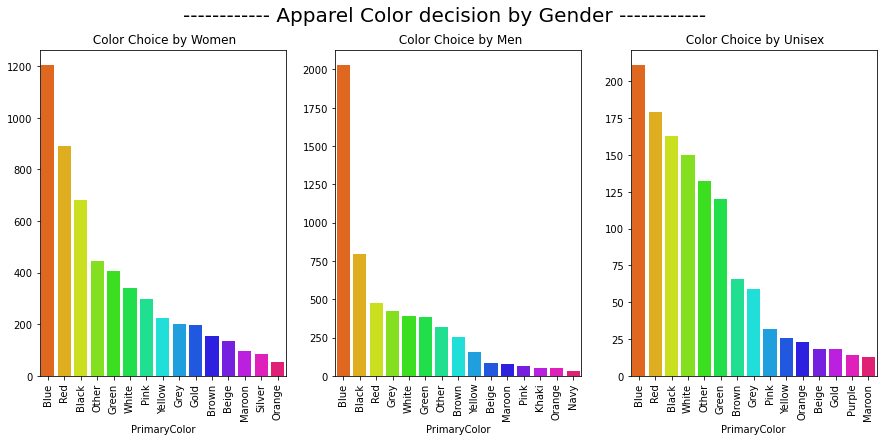

In [52]:
plt.figure(  figsize = (15, 6) )
plt.suptitle("------------ Apparel Color decision by Gender ------------", fontsize = 20)


##  ************************************************************************ ##

plt.subplot(1, 3, 1)
df_gender = df[ df['NewGender'] == "Women" ]
group = df_gender.groupby("PrimaryColor").agg( TotalRecords = ("ProductID", 'size'))
sns.barplot(x = group.sort_values(by = 'TotalRecords', ascending = False).index[ : 15], 
            y = group.sort_values(by = 'TotalRecords', ascending = False).TotalRecords.values[ : 15], 
            palette = "hsv")
plt.xticks(rotation = 90)
plt.title( f" Color Choice by {df_gender['NewGender'].unique()[0]}")

##  ************************************************************************ ##

plt.subplot(1, 3, 2)
df_gender = df[ df['NewGender'] == "Men" ]
group = df_gender.groupby("PrimaryColor").agg( TotalRecords = ("ProductID", 'size'))
sns.barplot(x = group.sort_values(by = 'TotalRecords', ascending = False).index[ : 15], 
            y = group.sort_values(by = 'TotalRecords', ascending = False).TotalRecords.values[ : 15], 
            palette = "hsv")
plt.xticks(rotation = 90)
plt.title( f" Color Choice by {df_gender['NewGender'].unique()[0]}")


##  ************************************************************************ ##

plt.subplot(1, 3, 3)
df_gender = df[ df['NewGender'] == "Unisex" ]
group = df_gender.groupby("PrimaryColor").agg( TotalRecords = ("ProductID", 'size'))
sns.barplot(x = group.sort_values(by = 'TotalRecords', ascending = False).index[ : 15], 
            y = group.sort_values(by = 'TotalRecords', ascending = False).TotalRecords.values[ : 15], 
            palette = "hsv")
plt.xticks(rotation = 90)
plt.title( f" Color Choice by {df_gender['NewGender'].unique()[0]}")


plt.show()

## Task3

1.	Create a new Column “DescriptionLength” to analyse further its distribution.
    
    Logic Applied ==> Each record of DescriptionLength is equal to the number of chars in Description


2.	Complete the analysis of DescriptionLength along with other categorical cols. 
3.	Isn’t it important to check if attribute information is also included in Description? Complete this task before answering it. 


## Create Description Length Columns

In [189]:
df['Length'] = df.Description.apply(lambda x : len(x))

In [190]:
df.head()

,ProductID,ProductName,ProductBrand,Gender,Price,NumImages,Description,PrimaryColor,NewGender,Length
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,11745,7,"Black and grey printed medium trolley bag, sec...",Black,Unisex,401
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,5810,7,Beige & Grey made to measure kurta with churid...,Beige,Women,620
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR,Women,899,7,Pink coloured wash 5-pocket high-rise cropped ...,Pink,Women,133
3,10015921,Raymond Men Blue Self-Design Single-Breasted B...,Raymond,Men,5599,5,Blue self-design bandhgala suitBlue self-desig...,Blue,Men,340
4,10017833,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx,Men,759,5,"Brown and off-white printed casual shirt, has ...",White,Men,122


### Analyzing  Gender Groups with Description Length
###### Studying their totalrecords, avglength against each of the category

In [191]:
newgender_group = df.groupby("NewGender").agg( TotalRecords = ("ProductID", 'size'), 
                                                   AvgLength = ("Length", 'mean'))
newgender_group

,TotalRecords,AvgLength
NewGender,,
Men,5691,140.587243
Unisex,1234,198.464344
Women,5566,169.492454


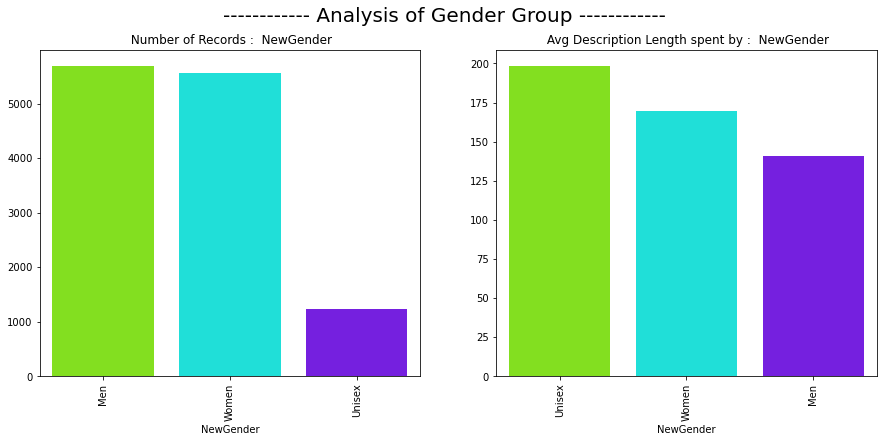

In [192]:
plt.figure(  figsize = (15, 6) )
plt.suptitle("------------ Analysis of Gender Group ------------", fontsize = 20)


plt.subplot(1, 2, 1)
sns.barplot(x = newgender_group.sort_values(by = 'TotalRecords', ascending = False).index, 
            y = newgender_group.sort_values(by = 'TotalRecords', ascending = False).TotalRecords.values, 
            palette = "hsv")
plt.xticks(rotation = 90)
plt.title( f" Number of Records :  {newgender_group.index.name}")

plt.subplot(1, 2, 2)
sns.barplot(x = newgender_group.sort_values(by = 'AvgLength', ascending = False).index, 
            y = newgender_group.sort_values(by = 'AvgLength', ascending = False).AvgLength.values, 
            palette = "hsv")
plt.xticks(rotation = 90)
plt.title( f" Avg Description Length spent by :  {newgender_group.index.name}")


plt.show()

### Analyzing  ProductBrand Groups with Desciption Length
###### Studying their totalrecords, avglength for top 15 values against each of the category

In [193]:
products_group = df.groupby("ProductBrand").agg( TotalRecords = ("ProductID", 'size'), 
                                                   AvgPrice = ("Price", 'mean'), 
                                                   AvgImages = ("NumImages", "mean"), 
                                               AvgLength = ("Length", 'mean'))
products_group.head(6)

,TotalRecords,AvgPrice,AvgImages,AvgLength
ProductBrand,,,,
109F,1,1299.0000,5.0000,102.0000
20Dresses,3,1153.0000,5.0000,110.0000
612 league,16,713.3125,3.5625,112.3125
7Rainbow,3,598.0000,5.0000,365.0000
AASK,1,1499.0000,5.0000,69.0000
ABELINO,1,442.0000,4.0000,162.0000


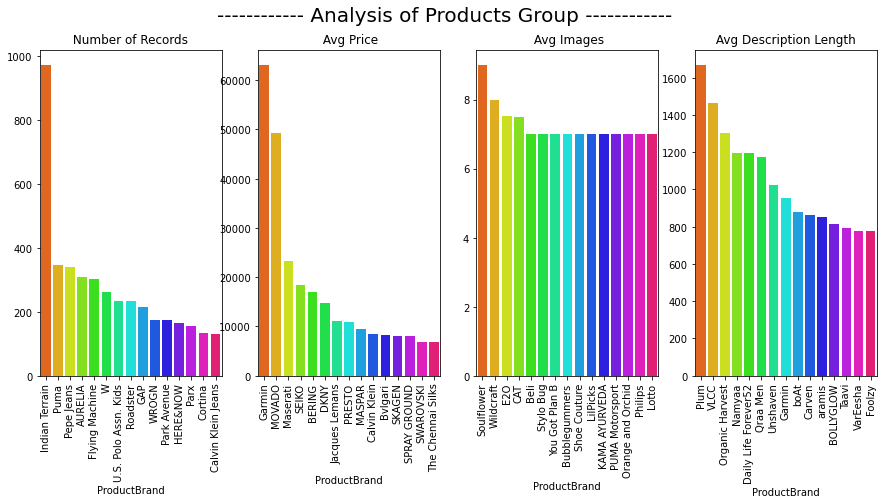

In [194]:
plt.figure(  figsize = (15, 6) )
plt.suptitle("------------ Analysis of Products Group ------------", fontsize = 20)


plt.subplot(1, 4, 1)
sns.barplot(x = products_group.sort_values(by = 'TotalRecords', ascending = False).index[ : 15], 
            y = products_group.sort_values(by = 'TotalRecords', ascending = False).TotalRecords.values[ : 15], 
            palette = "hsv")
plt.xticks(rotation = 90)
plt.title( f" Number of Records ")

plt.subplot(1, 4, 2)
sns.barplot(x = products_group.sort_values(by = 'AvgPrice', ascending = False).index[ : 15], 
            y = products_group.sort_values(by = 'AvgPrice', ascending = False).AvgPrice.values[ : 15], 
            palette = "hsv")
plt.xticks(rotation = 90)
plt.title( f" Avg Price")

plt.subplot(1, 4, 3)
sns.barplot(x = products_group.sort_values(by = 'AvgImages', ascending = False).index[ : 15], 
            y = products_group.sort_values(by = 'AvgImages', ascending = False).AvgImages.values[ : 15], 
            palette = "hsv")
plt.xticks(rotation = 90)
plt.title( f" Avg Images")

plt.subplot(1, 4, 4)
sns.barplot(x = products_group.sort_values(by = 'AvgLength', ascending = False).index[ : 15], 
            y = products_group.sort_values(by = 'AvgLength', ascending = False).AvgLength.values[ : 15], 
            palette = "hsv")
plt.xticks(rotation = 90)
plt.title( f" Avg Description Length ")


plt.show()

**Description length doesn't seem to play a key role in making decision.**

**The products having highest avg description doesn't have highest avg price and highest no of records**

### Analyzing  Attribute values in Desciption

In [195]:
df.head(2)

,ProductID,ProductName,ProductBrand,Gender,Price,NumImages,Description,PrimaryColor,NewGender,Length
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,11745,7,"Black and grey printed medium trolley bag, sec...",Black,Unisex,401
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,5810,7,Beige & Grey made to measure kurta with churid...,Beige,Women,620


In [60]:
# Finding the %age of number of records that have Primary Color value mentioned in the Description

counter = 0
for each in range(  df.shape[0]  ) : 
    if (  df.loc[each , "PrimaryColor" ] in df.loc[ each , "Description" ] )  : 
        counter += 1
        
print(round ( ( counter / df.shape[0] ) * 100 , 2))

58.82


In [63]:
# Finding the %age of number of records that have Brand Name value mentioned in the Description

counter = 0
for each in range(  df.shape[0]  ) : 
    if (  df.loc[each , "ProductBrand" ] in df.loc[ each , "Description" ] )  : 
        counter += 1
        
print(round ( ( counter / df.shape[0] ) * 100 , 2))

4.76


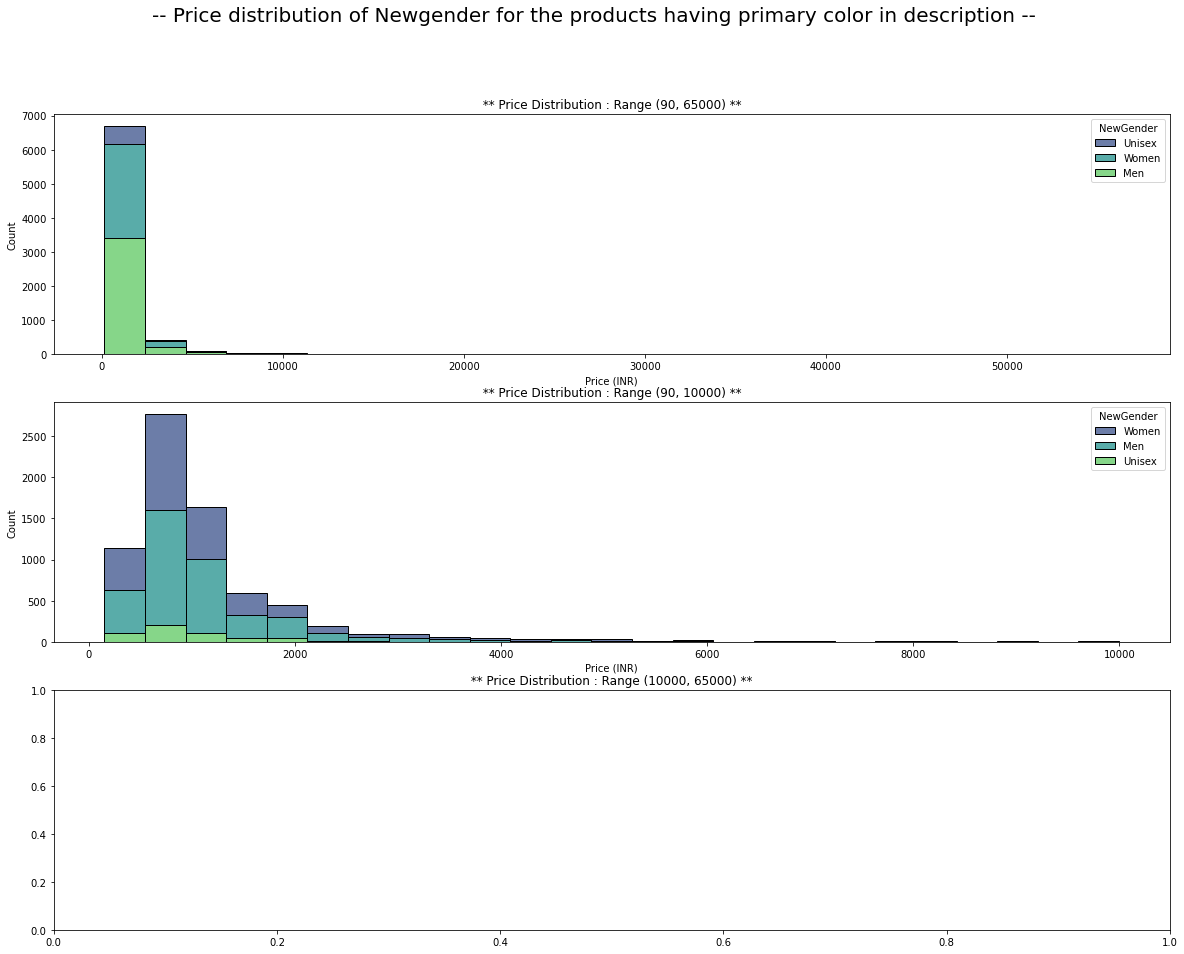

In [65]:
# Find the price distribution of the newgender for the products having primary color in description

plt.figure(  figsize = (20, 15) )
plt.suptitle("-- Price distribution of Newgender for the products having primary color in description --", fontsize = 20)

rowIndex = []
for each in range(  df.shape[0]  ) : 
    if (  df.loc[each , "PrimaryColor" ] in df.loc[ each , "Description" ] )  : 
        rowIndex.append(each)
# print(rowIndex)

plt.subplot(3, 1, 1)
dfNew = df.loc[ rowIndex,  ]
sns.histplot( x = dfNew['Price (INR)'] ,hue = dfNew['NewGender'], palette = "viridis", bins = 25, multiple="stack")
plt.title(" ** Price Distribution : Range (90, 65000) ** ")

plt.subplot(3, 1, 2)
dfNew = dfNew[ dfNew["Price (INR)"] <= 10000 ]
sns.histplot( x = dfNew['Price (INR)'] ,hue = dfNew['NewGender'], palette = "viridis", bins = 25, multiple="stack")
plt.title(" ** Price Distribution : Range (90, 10000) ** ")


plt.subplot(3, 1, 3)
dfNew = dfNew[ dfNew["Price (INR)"] > 10000 ]
sns.histplot( x = dfNew['Price (INR)'] ,hue = dfNew['NewGender'], palette = "viridis", bins = 25, multiple="stack")
plt.title(" ** Price Distribution : Range (10000, 65000) ** ")

plt.show()

There are no records more than 10000